### Steps for CNN of ASL Dataset

Load ASL training and test datasets 
- don't know how to process the image from individual pixels to torch or matplotlib

Define a Convolutional Neural Network
- working on understand different parts of torch architecture steps

Define a loss function

Train the network on the training data

Test the network on the test data

Visualize # of each letter in datasets(Bar graph to show samples in each class)

Randomly generate 1 sample from each class

Show correctly classified and wrongly classified to show why some are easier to classify vs harder to classify

#### Dataset Origin 
https://www.kaggle.com/datamunge/sign-language-mnist

#### pytorch model inspiration
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

#### tensorflow model inspiration
https://github.com/BrianMH/ECE196_Demo/blob/master/CNN_Demo.ipynb

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# from tensorflow.keras.datasets import mnist

In [2]:
df_test = pd.read_csv('./sign_mnist_test.csv')
df_train = pd.read_csv('./sign_mnist_train.csv')

In [3]:
df_train.head() # shows first 5 entries in training dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#separate labels (letter classes) from training data set
#drop label from rest of pixels
labels_train = df_train['label']
df_train = df_train.drop('label',axis = 1)

In [5]:
# #separate labels (letter classes) from test data set
#drop label from rest of pixels
labels_test = df_test['label']
df_test = df_test.drop('label',axis = 1)

In [7]:
# create dataframe with all labels to make a bargraph
frames = [labels_train,labels_test]
df_all_labels = pd.concat(frames)
print(df_all_labels.shape)
df_all_labels.head()

(34627,)


0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

Text(0.5, 1.0, 'All data')

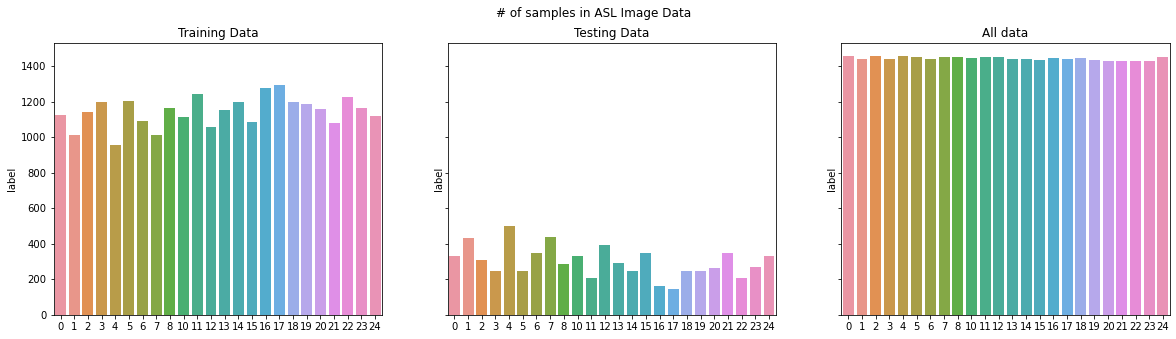

In [13]:
import seaborn as sns

'''Want to change so that 0,1,2,3 etc reads A,B,C,D etc'''
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('# of samples in ASL Image Data')

# Train data
sns.barplot(ax=axes[0], x=labels_train.value_counts().index, y=labels_train.value_counts())
axes[0].set_title('Training Data')

# Test Data
sns.barplot(ax=axes[1], x=labels_test.value_counts().index, y=labels_test.value_counts())
axes[1].set_title('Testing Data')

# Combined
sns.barplot(ax=axes[2], x=df_all_labels.value_counts().index, y=df_all_labels.value_counts())
axes[2].set_title('All data')

In [18]:
# convert pandas df to numpy array and reshape into 28x28 array as prep for picture
''' only relevant for following cell with random image display'''

np_train_img = df_train.to_numpy() #training dataset
np_train_img = np_train_img.reshape(np_train_img.shape[0],28,28)
np_test_img = df_test.to_numpy() # testing dataset
np_test_img = np_test_img.reshape(np_test_img.shape[0],28,28)




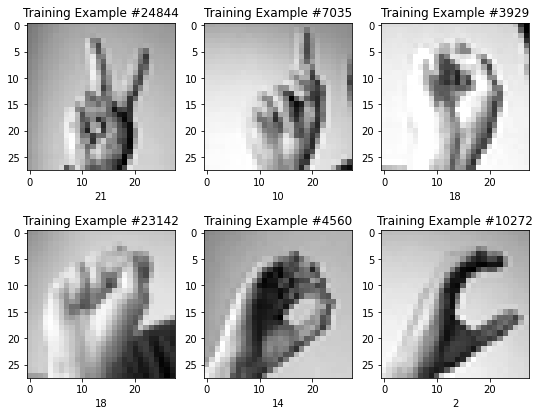

In [26]:
import random
# Shows 6 random training examples with labels
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    randindex = random.randint(0,len(np_train_img))
    plt.imshow(np_train_img[randindex],cmap='gray')
    plt.title(f"Training Example #{randindex}")
    plt.xlabel(labels_train[randindex])
    
plt.show()

In [30]:
#convert pandas to numpy arrays for use in tensorflow
np_test =df_test.to_numpy()
np_train = df_train.to_numpy()
labels_train = labels_train.to_numpy()
labels_test = labels_test.to_numpy()

In [31]:
# This loads in the dataset. Thankfully, TensorFlow already has methods to load this dataset

#define target values
y_train = labels_train
y_test = labels_test

# Normalize input values
x_train = np_train/255. #0-1
x_test = np_test/255.

# Generate 32x32 image set for use in LeNet
cnn_x_train = x_train.reshape(-1,28,28,1) # don't know what this 1 does
cnn_x_test = x_test.reshape(-1,28,28,1)

# Resize images for use in MLP
mlp_x_train = x_train.reshape((x_train.shape[0], 784))
mlp_x_test = x_test.reshape((x_test.shape[0], 784))

In [8]:
mlp_x_train.shape

(27455, 784)

In [9]:
# Implements the network using TensorFlow.Keras
def MLPNetwork(inputDim):
    # input layer (note that batches are already taken care of for you)
    x = keras.Input(shape=(inputDim,))
    
    # subsequent dense layers
    a1 = keras.layers.Dense(512, activation='relu')(x)
    a2 = keras.layers.Dense(512, activation='relu')(a1)
    
    # classification dense layer
    logits = keras.layers.Dense(25, activation='softmax')(a2)
    
    # Creates the model given the above structure
    model = keras.Model(inputs=x, outputs=logits)
    return model

MLPmod = MLPNetwork(784)
MLPmod.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 25)                12825     
Total params: 677,401
Trainable params: 677,401
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Sets up optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)
MLPmod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# The callback forces the network to train until it reaches 100% accuracy
hist = MLPmod.fit(mlp_x_train, y_train, epochs=10, shuffle=True)

Train on 27455 samples
Epoch 1/10
27455/27455 [==============================] - 4s 129us/sample - loss: 1.5623 - acc: 0.5060
Epoch 2/10
27455/27455 [==============================] - 3s 100us/sample - loss: 0.5682 - acc: 0.8141
Epoch 3/10
27455/27455 [==============================] - 2s 84us/sample - loss: 0.2673 - acc: 0.9155
Epoch 4/10
27455/27455 [==============================] - 3s 92us/sample - loss: 0.1443 - acc: 0.9543
Epoch 5/10
27455/27455 [==============================] - 3s 104us/sample - loss: 0.1044 - acc: 0.9682
Epoch 6/10
27455/27455 [==============================] - 3s 104us/sample - loss: 0.1161 - acc: 0.9627
Epoch 7/10
27455/27455 [==============================] - 2s 90us/sample - loss: 0.0111 - acc: 0.9981
Epoch 8/10
27455/27455 [==============================] - 3s 97us/sample - loss: 0.1109 - acc: 0.9626
Epoch 9/10
27455/27455 [==============================] - 3s 94us/sample - loss: 0.0523 - acc: 0.9842
Epoch 10/10
27455/27455 [==============================

In [12]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = MLPmod.evaluate(mlp_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 0s 60us/sample - loss: 0.8379 - acc: 0.8345
Test accuracy for this model is 0.8344952464103699


In [60]:
# Creates the model with LeNet architecture, first state of the art neural network
def LeNet():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    #dropout 1 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    # dropout 2
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  # more on this later
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) #access loss?
    
    return mod

# Declares the model and prepares it for training
LeNetMod = LeNet()
opt = keras.optimizers.Adam()
LeNetMod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
LeNetMod.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)               3084

In [61]:
from tensorflow.keras.callbacks import History

#History allows us to access accuracy and loss values in the model
history = History() 

# Trains the network using mini-batch learning
cnnHist = LeNetMod.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 3s 161us/sample - loss: 1.6684 - acc: 0.4897 - val_loss: 0.9078 - val_acc: 0.7086
Epoch 2/20
20591/20591 [==============================] - 3s 151us/sample - loss: 0.5639 - acc: 0.8202 - val_loss: 0.3080 - val_acc: 0.9063
Epoch 3/20
20591/20591 [==============================] - 3s 152us/sample - loss: 0.2137 - acc: 0.9352 - val_loss: 0.1217 - val_acc: 0.9703
Epoch 4/20
20591/20591 [==============================] - 3s 154us/sample - loss: 0.0878 - acc: 0.9790 - val_loss: 0.0552 - val_acc: 0.9888
Epoch 5/20
20591/20591 [==============================] - 3s 154us/sample - loss: 0.0372 - acc: 0.9932 - val_loss: 0.0212 - val_acc: 0.9974
Epoch 6/20
20591/20591 [==============================] - 3s 151us/sample - loss: 0.0181 - acc: 0.9978 - val_loss: 0.0691 - val_acc: 0.9777
Epoch 7/20
20591/20591 [==============================] - 3s 149us/sample - loss: 0.0307 - acc: 0.9917 - val_lo

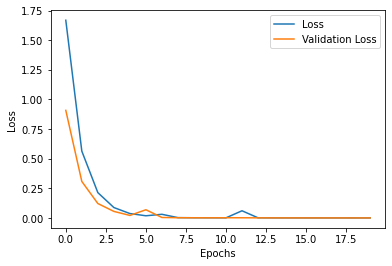

In [62]:
# cnnHist.history == dictionary with all saved loss and accuracy values
a = cnnHist.history['loss']
b = cnnHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [64]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = LeNetMod.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 85us/sample - loss: 0.7884 - acc: 0.8738
Test accuracy for this model is 0.8738148212432861
0.7884011269841558


In [98]:
# create pandas dataframe to store all model testing/training loss/acc
model_data = {'test': [],
                'training loss': [],
              'training acc': [],
              'testing loss':[],
              'testing acc': []}
model_info = pd.DataFrame(model_data)



In [99]:
#initialize data for new data frame row
new_row = {'test': ['LeNet original'],
                'training loss': [cnnHist.history['loss'][-1]],
              'training acc': [cnnHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000124,1.0,0.788401,0.873815


Text(0.5, 1.0, 'Number 6 classified as 7')

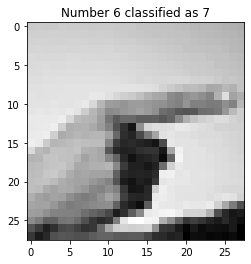

In [82]:
# Plot an incorrect value...
preds = LeNetMod.predict(cnn_x_test)
preds = np.argmax(preds, axis=1)
incorrectPreds = np.argwhere(preds != y_test)
randIncInd = np.random.choice(incorrectPreds.reshape(-1))
plt.imshow(cnn_x_test[randIncInd].reshape(28,28), cmap = 'gray')
plt.title("Number {} classified as {}".format(y_test[randIncInd], preds[randIncInd]))

Text(95.72222222222221, 0.5, 'Actual')

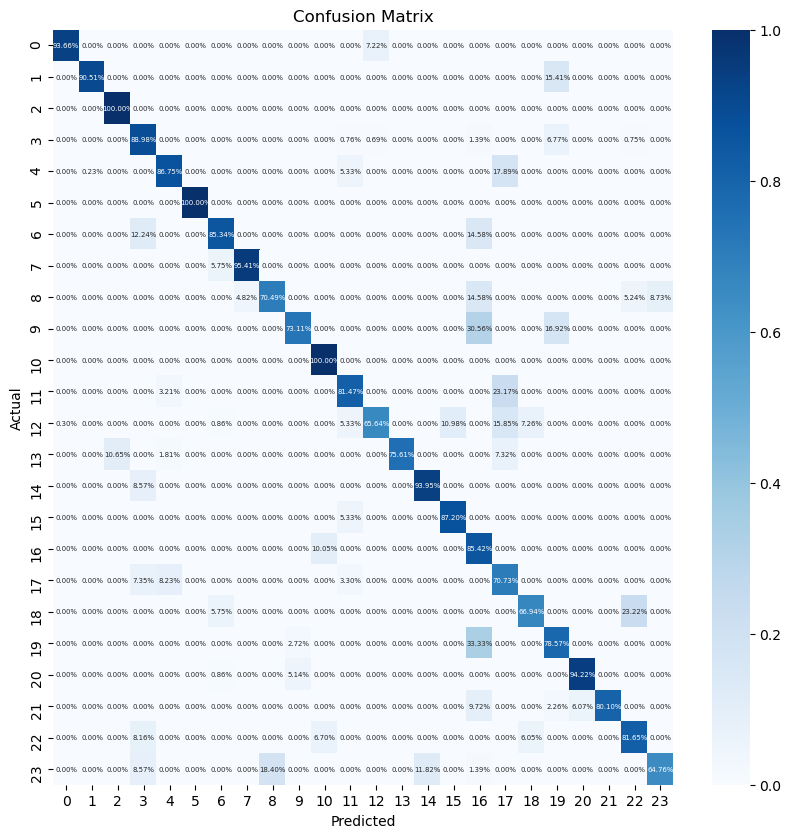

In [37]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

conMat = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,10), dpi=100)
heatmap(conMat/np.sum(conMat,axis=1), annot=True, annot_kws={"size": 5}, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Improvements 4-24

- add layers/architecture (available layers in tensorflow) dropout could be helpful
- dropout used in FNN, fully connected to delete certain weights (helps to generalize better)
- add penalty to certain classes e.g 16 is 42% incorrect, give greater weight to certain class
- data augmentation (rotate image, resizing)
- test different optimizer (SGD) and test different loss function (categorical cross entropy)
- .ImageDataGenerator??? rotates pictures?
- hyperparameters to consider: batch size, epochs, learning rate, kernel size, activation functions?

## 4/24/21 Improvements
- add layers/architecture (available layers in tensorflow) dropout could be helpful
- dropout used in FNN, fully connected to delete certain weights (helps to generalize better)
- add penalty to certain classes e.g 16 is 42% incorrect, give greater weight to certain class
- data augmentation (rotate image, resizing)
- convert numbers to A-Z for readability

## Implement VGG16 Architecture
- LeNet may be overfitting as training acc is 100% and test acc is 86%

In [136]:
# vgg = tf.keras.applications.vgg16.VGG16(
#     include_top=True, weights= None, input_tensor=None,
#     input_shape=None, pooling=None, classes=1000,
#     classifier_activation='softmax')

In [53]:
#vggmod = keras.applications.vgg16.VGG16(include_top = False, input_shape = (28,28,3))

In [75]:
# opt = keras.optimizers.Adam()
# vggmod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# vggmod.summary()

In [76]:
# cnn_vgg_hist = vggmod.fit(cnn_x_train, y_train, validation_split = 0.25, 
#                        batch_size=128, epochs=5, shuffle=True, callbacks = [history])

### Implementation considerations
- image augmentation via ImageDataGenerator
- early_stopping to stop model if it is not improving 


### Trying VGG 16
- overcomplicating the problem

In [143]:
from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense 
from tensorflow.keras import Model
# input
# https://towardsdatascience.com/creating-vgg-from-scratch-using-tensorflow-a998a5640155

vgginput = Input(shape =(28,28,1)) #changed from default shape of (224,224,3)
# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(vgginput)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# Fully connected layers

x = Flatten()(x)
x = Dense(units = 1024, activation ='relu')(x) #changed num units
x = Dense(units = 1024, activation ='relu')(x) #changed num units
output = Dense(units = 25, activation ='softmax')(x) #changed num units
# creating the model

vggmodel = Model (inputs=vgginput, outputs =output)
opt = keras.optimizers.Adam()
vggmodel.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vggmodel.summary()

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 7, 7, 128)         0  

In [144]:
vggHist = vggmodel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=5, shuffle=True, callbacks = [history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/5
20591/20591 [==============================] - 14s 678us/sample - loss: 3.1856 - acc: 0.0436 - val_loss: 3.1798 - val_acc: 0.0425
Epoch 2/5
20591/20591 [==============================] - 12s 599us/sample - loss: 3.1790 - acc: 0.0453 - val_loss: 3.1786 - val_acc: 0.0468
Epoch 3/5
20591/20591 [==============================] - 12s 595us/sample - loss: 3.1787 - acc: 0.0435 - val_loss: 3.1780 - val_acc: 0.0468
Epoch 4/5
20591/20591 [==============================] - 12s 600us/sample - loss: 3.1781 - acc: 0.0438 - val_loss: 3.1774 - val_acc: 0.0468
Epoch 5/5
20591/20591 [==============================] - 12s 595us/sample - loss: 3.1775 - acc: 0.0448 - val_loss: 3.1773 - val_acc: 0.0468


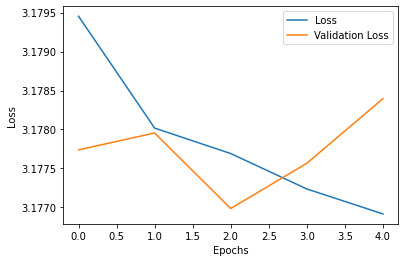

In [69]:
vggHist.history# training loss
a = vggHist.history['loss']
b = vggHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [68]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = vggmodel.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 2s 299us/sample - loss: 3.1947 - acc: 0.0342
Test accuracy for this model is 0.03416062518954277


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['vgg16 reshaped'],
                'training loss': [vggHist.history['loss'][-1]],
              'training acc': [vggHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

### Constants in testing
 - kernel size = 5x5
 - learning rate = .001
 - batch size = 50
 - epochs = 20
 - validation split = 25%
 - optimizer = opt = Adam() opt = keras.optimizers.Adam()
 - relu activation function
 - softmax activation function to classify at end of model
 - sparse_categorical_crossentropy loss model

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping( monitor = 'loss', min_delta=0.001, # minimium amount of decreasing loss to count as improvement
                                patience=10, # how many epochs to wait before stopping
                                restore_best_weights=True
                              )

## Testing Structure
- create a new CNN model
- compile model
- fit model to training data
- test model with testing data
- log accuracy, loss
- (maybe) input testing and training loss of each model in a bar graph?


,test,training loss,training acc,testing loss,testing acc


### Test #1 
- add dropout layer after first pooling
- try 10% and 20% and continue on with that

In [74]:
# LeNet model with 10 % dropoout after first pooling
def testModel_1a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod1a = testModel_1a()
testMod1a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod1a.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_5 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_6 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)               0  

In [83]:
testMod1aHist = testMod1a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 3s 159us/sample - loss: 0.0243 - acc: 0.9930 - val_loss: 0.0044 - val_acc: 0.9993
Epoch 2/20
20591/20591 [==============================] - 3s 154us/sample - loss: 0.0112 - acc: 0.9973 - val_loss: 0.0035 - val_acc: 0.9999
Epoch 3/20
20591/20591 [==============================] - 3s 153us/sample - loss: 0.0124 - acc: 0.9966 - val_loss: 0.0046 - val_acc: 0.9990
Epoch 4/20
20591/20591 [==============================] - 3s 133us/sample - loss: 0.0323 - acc: 0.9902 - val_loss: 0.0022 - val_acc: 0.9999
Epoch 5/20
20591/20591 [==============================] - 3s 139us/sample - loss: 0.0041 - acc: 0.9993 - val_loss: 4.1704e-04 - val_acc: 1.0000
Epoch 6/20
20591/20591 [==============================] - 3s 144us/sample - loss: 0.0066 - acc: 0.9982 - val_loss: 0.0041 - val_acc: 0.9999
Epoch 7/20
20591/20591 [==============================] - 3s 154us/sample - loss: 0.0096 - acc: 0.9974 - va

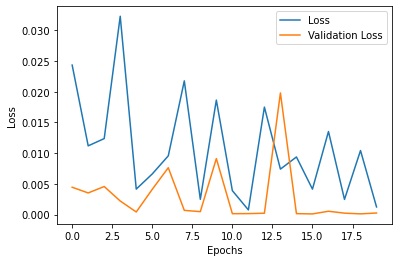

In [84]:
# testMod1aHist.history# training loss
a = testMod1aHist.history['loss']
b = testMod1aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [97]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod1a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 86us/sample - loss: 0.3988 - acc: 0.9307
Test accuracy for this model is 0.9307027459144592


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['1a: 10% DO'],
                'training loss': [testMod1aHist.history['loss'][-1]],
              'training acc': [testMod1aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

In [98]:
# LeNet model with 20 % dropoout after first pooling
def testModel_1b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod1b = testModel_1b()
testMod1b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod1b.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_11 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_12 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)               0  

In [99]:
testMod1bHist = testMod1b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 180us/sample - loss: 1.4218 - acc: 0.5455 - val_loss: 0.5257 - val_acc: 0.8441
Epoch 2/20
20591/20591 [==============================] - 3s 141us/sample - loss: 0.4454 - acc: 0.8480 - val_loss: 0.2107 - val_acc: 0.9384
Epoch 3/20
20591/20591 [==============================] - 3s 140us/sample - loss: 0.2349 - acc: 0.9200 - val_loss: 0.1084 - val_acc: 0.9760
Epoch 4/20
20591/20591 [==============================] - 3s 146us/sample - loss: 0.1484 - acc: 0.9517 - val_loss: 0.0579 - val_acc: 0.9879
Epoch 5/20
20591/20591 [==============================] - 3s 123us/sample - loss: 0.0941 - acc: 0.9726 - val_loss: 0.0303 - val_acc: 0.9953
Epoch 6/20
20591/20591 [==============================] - 3s 129us/sample - loss: 0.0705 - acc: 0.9794 - val_loss: 0.0190 - val_acc: 0.9980
Epoch 7/20
20591/20591 [==============================] - 3s 155us/sample - loss: 0.0542 - acc: 0.9832 - val_lo

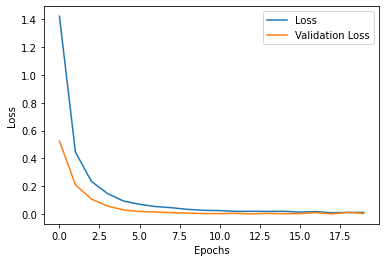

In [100]:
# testMod1bHist.history
a = testMod1bHist.history['loss']
b = testMod1bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [101]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod1b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 97us/sample - loss: 0.4644 - acc: 0.8961
Test accuracy for this model is 0.8961238265037537


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['1b: 20% DO'],
                'training loss': [testMod1bHist.history['loss'][-1]],
              'training acc': [testMod1bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

### Test #2
- add dropout layer after second pooling
- try 10% and 20% and continue on with that

In [102]:
# LeNet model with 10 % dropoout after second pooling
def testModel_2a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod2a = testModel_2a()
testMod2a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod2a.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_14 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 256)               0  

In [103]:
testMod2aHist = testMod2a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 174us/sample - loss: 1.3855 - acc: 0.5569 - val_loss: 0.5450 - val_acc: 0.8399
Epoch 2/20
20591/20591 [==============================] - 3s 138us/sample - loss: 0.4453 - acc: 0.8495 - val_loss: 0.2549 - val_acc: 0.9165
Epoch 3/20
20591/20591 [==============================] - 3s 138us/sample - loss: 0.2327 - acc: 0.9227 - val_loss: 0.1172 - val_acc: 0.9677
Epoch 4/20
20591/20591 [==============================] - 3s 139us/sample - loss: 0.1447 - acc: 0.9525 - val_loss: 0.0687 - val_acc: 0.9844
Epoch 5/20
20591/20591 [==============================] - 3s 133us/sample - loss: 0.1045 - acc: 0.9660 - val_loss: 0.0358 - val_acc: 0.9902
Epoch 6/20
20591/20591 [==============================] - 3s 143us/sample - loss: 0.0879 - acc: 0.9730 - val_loss: 0.0334 - val_acc: 0.9939
Epoch 7/20
20591/20591 [==============================] - 3s 157us/sample - loss: 0.0611 - acc: 0.9808 - val_lo

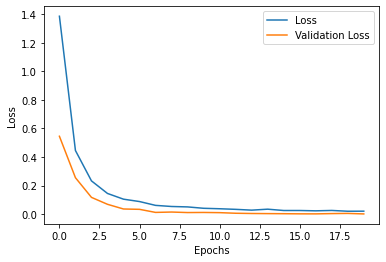

In [104]:
a = testMod2aHist.history['loss']
b = testMod2aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [105]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod2a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 99us/sample - loss: 0.6794 - acc: 0.8816
Test accuracy for this model is 0.8816229701042175


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['2a: 10% DO'],
                'training loss': [testMod2aHist.history['loss'][-1]],
              'training acc': [testMod2aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

In [47]:
# LeNet model with 20 % dropoout after second pooling
def testModel_2b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod2b = testModel_2b()
testMod2b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod2b.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0   

In [48]:
testMod2bHist = testMod2b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 172us/sample - loss: 1.6086 - acc: 0.4769 - val_loss: 0.6513 - val_acc: 0.7839
Epoch 2/20
20591/20591 [==============================] - 3s 157us/sample - loss: 0.5766 - acc: 0.8052 - val_loss: 0.2937 - val_acc: 0.9009
Epoch 3/20
20591/20591 [==============================] - 3s 157us/sample - loss: 0.3300 - acc: 0.8861 - val_loss: 0.1393 - val_acc: 0.9626
Epoch 4/20
20591/20591 [==============================] - 3s 160us/sample - loss: 0.2119 - acc: 0.9272 - val_loss: 0.0615 - val_acc: 0.9848
Epoch 5/20
20591/20591 [==============================] - 3s 154us/sample - loss: 0.1540 - acc: 0.9477 - val_loss: 0.0405 - val_acc: 0.9942
Epoch 6/20
20591/20591 [==============================] - 3s 158us/sample - loss: 0.1233 - acc: 0.9610 - val_loss: 0.0237 - val_acc: 0.9993
Epoch 7/20
20591/20591 [==============================] - 3s 160us/sample - loss: 0.0939 - acc: 0.9693 - val_lo

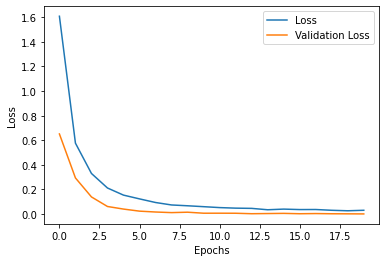

In [49]:
a = testMod2bHist.history['loss']
b = testMod2bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [50]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod2b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 93us/sample - loss: 0.4405 - acc: 0.8926
Test accuracy for this model is 0.8926380276679993


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['2b: 20% DO'],
                'training loss': [testMod2bHist.history['loss'][-1]],
              'training acc': [testMod2bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

### Test #3
- add both dropout layers together

In [110]:
# LeNet model with 10 % dropoout after second pooling
def testModel_3():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod3 = testModel_3()
testMod3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod3.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_17 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_18 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 4, 16)          0  

In [111]:
testMod3Hist = testMod3.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 227us/sample - loss: 1.8268 - acc: 0.4222 - val_loss: 0.7234 - val_acc: 0.7679
Epoch 2/20
20591/20591 [==============================] - 3s 150us/sample - loss: 0.6587 - acc: 0.7743 - val_loss: 0.3124 - val_acc: 0.9054
Epoch 3/20
20591/20591 [==============================] - 3s 146us/sample - loss: 0.3705 - acc: 0.8736 - val_loss: 0.1343 - val_acc: 0.9732
Epoch 4/20
20591/20591 [==============================] - 3s 151us/sample - loss: 0.2428 - acc: 0.9198 - val_loss: 0.0687 - val_acc: 0.9889
Epoch 5/20
20591/20591 [==============================] - 3s 160us/sample - loss: 0.1735 - acc: 0.9437 - val_loss: 0.0500 - val_acc: 0.9917
Epoch 6/20
20591/20591 [==============================] - 3s 164us/sample - loss: 0.1356 - acc: 0.9568 - val_loss: 0.0348 - val_acc: 0.9940
Epoch 7/20
20591/20591 [==============================] - 3s 152us/sample - loss: 0.1089 - acc: 0.9655 - val_lo

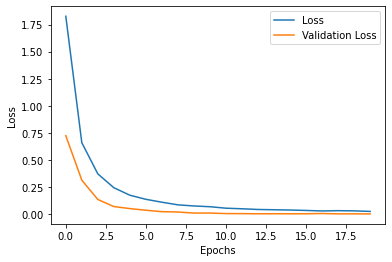

In [112]:
a = testMod3Hist.history['loss']
b = testMod3Hist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [113]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod3.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 106us/sample - loss: 0.2908 - acc: 0.9260
Test accuracy for this model is 0.9259620904922485


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['3: 2 DO layers'],
                'training loss': [testMod3Hist.history['loss'][-1]],
              'training acc': [testMod3Hist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

### Best performance so far is with 2b - 20% dropout after second convolution and pooling
### now test removing dense layers

### Test #4
- remove dense layer 1 and 2 
- combine best w/ 2b

In [114]:
# LeNet model with one less dense layer
def testModel_4a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
#   out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4a = testModel_4a()
testMod4a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4a.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_19 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_20 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 84)                215

In [115]:
testMod4aHist = testMod4a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 181us/sample - loss: 1.4598 - acc: 0.5438 - val_loss: 0.8447 - val_acc: 0.7315
Epoch 2/20
20591/20591 [==============================] - 3s 126us/sample - loss: 0.6313 - acc: 0.7971 - val_loss: 0.4526 - val_acc: 0.8488
Epoch 3/20
20591/20591 [==============================] - 2s 118us/sample - loss: 0.3544 - acc: 0.8864 - val_loss: 0.2486 - val_acc: 0.9273
Epoch 4/20
20591/20591 [==============================] - 3s 135us/sample - loss: 0.2083 - acc: 0.9399 - val_loss: 0.1392 - val_acc: 0.9652
Epoch 5/20
20591/20591 [==============================] - 3s 140us/sample - loss: 0.1181 - acc: 0.9712 - val_loss: 0.0905 - val_acc: 0.9771
Epoch 6/20
20591/20591 [==============================] - 3s 136us/sample - loss: 0.0739 - acc: 0.9846 - val_loss: 0.0460 - val_acc: 0.9929
Epoch 7/20
20591/20591 [==============================] - 3s 144us/sample - loss: 0.0438 - acc: 0.9931 - val_lo

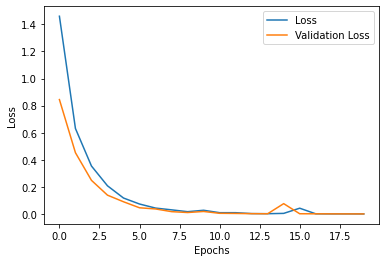

In [116]:
a = testMod4aHist.history['loss']
b = testMod4aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [117]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 88us/sample - loss: 0.9792 - acc: 0.8448
Test accuracy for this model is 0.8448131680488586


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['4a: remove 120 dense'],
                'training loss': [testMod4aHist.history['loss'][-1]],
              'training acc': [testMod4aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

In [118]:
# LeNet model with one less dense layer
def testModel_4b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
#   out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4b = testModel_4b()
testMod4b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4b.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_21 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_22 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 120)               308

In [119]:
testMod4bHist = testMod4b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 188us/sample - loss: 1.2620 - acc: 0.6013 - val_loss: 0.5018 - val_acc: 0.8389
Epoch 2/20
20591/20591 [==============================] - 3s 149us/sample - loss: 0.3168 - acc: 0.9038 - val_loss: 0.1603 - val_acc: 0.9578
Epoch 3/20
20591/20591 [==============================] - 2s 110us/sample - loss: 0.1175 - acc: 0.9707 - val_loss: 0.0573 - val_acc: 0.9927
Epoch 4/20
20591/20591 [==============================] - 3s 129us/sample - loss: 0.0499 - acc: 0.9924 - val_loss: 0.0412 - val_acc: 0.9929
Epoch 5/20
20591/20591 [==============================] - 3s 139us/sample - loss: 0.0272 - acc: 0.9966 - val_loss: 0.0157 - val_acc: 0.9991
Epoch 6/20
20591/20591 [==============================] - 3s 142us/sample - loss: 0.0122 - acc: 0.9993 - val_loss: 0.0081 - val_acc: 0.9996
Epoch 7/20
20591/20591 [==============================] - 2s 117us/sample - loss: 0.0092 - acc: 0.9993 - val_lo

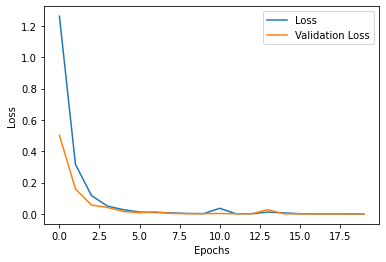

In [120]:
a = testMod4bHist.history['loss']
b = testMod4bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [121]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 99us/sample - loss: 0.7827 - acc: 0.8516
Test accuracy for this model is 0.851645290851593


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['4b: remove 84 dense'],
                'training loss': [testMod4bHist.history['loss'][-1]],
              'training acc': [testMod4bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

In [122]:
# LeNet model with one less dense layer and 20% dropout after second pooling
def testModel_4c():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
#   out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4c = testModel_4c()
testMod4c.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4c.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_23 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_24 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 256)               0  

In [123]:
testMod4cHist = testMod4c.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 195us/sample - loss: 1.4005 - acc: 0.5598 - val_loss: 0.5132 - val_acc: 0.8593
Epoch 2/20
20591/20591 [==============================] - 3s 145us/sample - loss: 0.5216 - acc: 0.8275 - val_loss: 0.2389 - val_acc: 0.9387
Epoch 3/20
20591/20591 [==============================] - 3s 142us/sample - loss: 0.3289 - acc: 0.8907 - val_loss: 0.1328 - val_acc: 0.9674
Epoch 4/20
20591/20591 [==============================] - 3s 135us/sample - loss: 0.2347 - acc: 0.9222 - val_loss: 0.0838 - val_acc: 0.9847
Epoch 5/20
20591/20591 [==============================] - 3s 127us/sample - loss: 0.1779 - acc: 0.9398 - val_loss: 0.0467 - val_acc: 0.9936
Epoch 6/20
20591/20591 [==============================] - 2s 120us/sample - loss: 0.1480 - acc: 0.9514 - val_loss: 0.0378 - val_acc: 0.9983
Epoch 7/20
20591/20591 [==============================] - 2s 114us/sample - loss: 0.1222 - acc: 0.9596 - val_lo

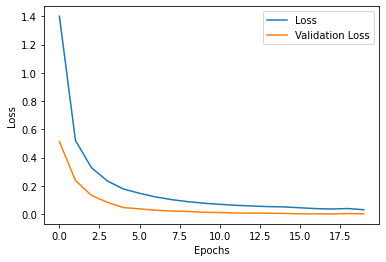

In [124]:
a = testMod4cHist.history['loss']
b = testMod4cHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [125]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4c.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 98us/sample - loss: 0.3989 - acc: 0.8940
Test accuracy for this model is 0.89403235912323


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['4c: remove 84 dense, add 20% DO'],
                'training loss': [testMod4cHist.history['loss'][-1]],
              'training acc': [testMod4cHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

## combination of dropped dense layer and dropout not as good as dropout alone

### Test #5
- add extra convolution layer before pooling
- combine it with dropout
- combine with dropout and dense layer missing

In [126]:
# LeNet model with additional convolution layer
def testModel_5a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod5a = testModel_5a()
testMod5a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod5a.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_25 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_26 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 128)               0  

In [127]:
testMod5aHist = testMod5a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 226us/sample - loss: 1.8507 - acc: 0.3953 - val_loss: 1.0088 - val_acc: 0.6640
Epoch 2/20
20591/20591 [==============================] - 3s 142us/sample - loss: 0.7074 - acc: 0.7597 - val_loss: 0.4555 - val_acc: 0.8478
Epoch 3/20
20591/20591 [==============================] - 3s 145us/sample - loss: 0.3492 - acc: 0.8815 - val_loss: 0.2443 - val_acc: 0.9213
Epoch 4/20
20591/20591 [==============================] - 3s 159us/sample - loss: 0.1723 - acc: 0.9449 - val_loss: 0.1402 - val_acc: 0.9535
Epoch 5/20
20591/20591 [==============================] - 3s 136us/sample - loss: 0.0999 - acc: 0.9707 - val_loss: 0.1462 - val_acc: 0.9471
Epoch 6/20
20591/20591 [==============================] - 3s 153us/sample - loss: 0.0616 - acc: 0.9825 - val_loss: 0.0473 - val_acc: 0.9875
Epoch 7/20
20591/20591 [==============================] - 3s 152us/sample - loss: 0.0414 - acc: 0.9887 - val_lo

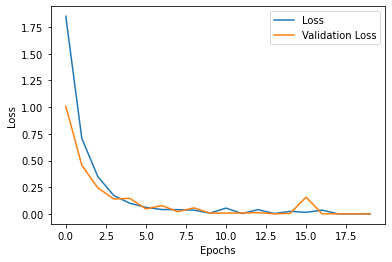

In [128]:
a = testMod5aHist.history['loss']
b = testMod5aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [129]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod5a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 111us/sample - loss: 1.0199 - acc: 0.8429
Test accuracy for this model is 0.8428611159324646


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['5a: Add Conv 32 out'],
                'training loss': [testMod5aHist.history['loss'][-1]],
              'training acc': [testMod5aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

In [138]:
#5b combine convolutional layer with 20 %dropout
# LeNet model with additional convolution layer
def testModel_5b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod5b = testModel_5b()
testMod5b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod5b.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_29 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_30 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 2, 2, 32)          0  

In [139]:
testMod5bHist = testMod5b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 231us/sample - loss: 1.7266 - acc: 0.4386 - val_loss: 0.7806 - val_acc: 0.7554
Epoch 2/20
20591/20591 [==============================] - 3s 159us/sample - loss: 0.8180 - acc: 0.7165 - val_loss: 0.4406 - val_acc: 0.8705
Epoch 3/20
20591/20591 [==============================] - 3s 161us/sample - loss: 0.5732 - acc: 0.8003 - val_loss: 0.2896 - val_acc: 0.9097
Epoch 4/20
20591/20591 [==============================] - 3s 157us/sample - loss: 0.4376 - acc: 0.8454 - val_loss: 0.1691 - val_acc: 0.9557
Epoch 5/20
20591/20591 [==============================] - 3s 154us/sample - loss: 0.3464 - acc: 0.8812 - val_loss: 0.1177 - val_acc: 0.9679
Epoch 6/20
20591/20591 [==============================] - 3s 149us/sample - loss: 0.2918 - acc: 0.8979 - val_loss: 0.0783 - val_acc: 0.9847
Epoch 7/20
20591/20591 [==============================] - 3s 147us/sample - loss: 0.2438 - acc: 0.9154 - val_lo

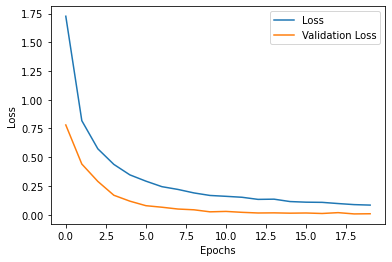

In [140]:
a = testMod5bHist.history['loss']
b = testMod5bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [141]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod5b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 92us/sample - loss: 0.4010 - acc: 0.8979
Test accuracy for this model is 0.8979364037513733


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['5b: Add Conv 32 out and 20% DO'],
                'training loss': [testMod5bHist.history['loss'][-1]],
              'training acc': [testMod5bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

### Test #6
- add image augmentation
- different levels of rotation/scaling?

In [146]:
# use keras preprocessing to apply random image manipulations and increase model especially as it relates to location
# and rotation invariance
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
augmentedData = ImageDataGenerator(rotation_range= 10, # randomly rotate images in the range 15 degrees 
                                   zoom_range = 0.1, # Randomly zoom image 10% 
                                   width_shift_range=0.1, # randomly shift images horizontally 10%
                                   height_shift_range=0.1, # randomly shift images vertically 10% 
                                   shear_range = 0.1) #randomly distorts/shears image, value affects intensity
augmentedData.fit(cnn_x_train)
train_generator = augmentedData.flow(cnn_x_train,y_train, batch_size = 50)



In [152]:
#Original LeNet model w/ data augmentation
def testModel_6a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod6a = testModel_6a()
testMod6a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod6a.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_33 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_34 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 120)               308

In [153]:
#using test data as validation data because image data generator does not allow simple validation split
testMod6aHist = testMod6a.fit(train_generator, validation_data = (cnn_x_test,y_test), 
                              epochs=20, shuffle=True, callbacks = [early_stopping, history])

Epoch 1/20
550/550 [==============================] - 14s 26ms/step - loss: 2.3257 - acc: 0.2689 - val_loss: 1.4063 - val_acc: 0.5566
Epoch 2/20
550/550 [==============================] - 11s 19ms/step - loss: 1.5252 - acc: 0.4954 - val_loss: 0.9734 - val_acc: 0.6829
Epoch 3/20
550/550 [==============================] - 11s 20ms/step - loss: 1.2346 - acc: 0.5850 - val_loss: 0.8189 - val_acc: 0.7352
Epoch 4/20
550/550 [==============================] - 10s 19ms/step - loss: 1.0480 - acc: 0.6470 - val_loss: 0.7569 - val_acc: 0.7552
Epoch 5/20
550/550 [==============================] - 11s 19ms/step - loss: 0.9278 - acc: 0.6864 - val_loss: 0.6315 - val_acc: 0.7833
Epoch 6/20
550/550 [==============================] - 11s 19ms/step - loss: 0.8480 - acc: 0.7138 - val_loss: 0.5417 - val_acc: 0.8190
Epoch 7/20
550/550 [==============================] - 11s 21ms/step - loss: 0.7601 - acc: 0.7452 - val_loss: 0.5450 - val_acc: 0.8226
Epoch 8/20
550/550 [==============================] - 12s 22ms

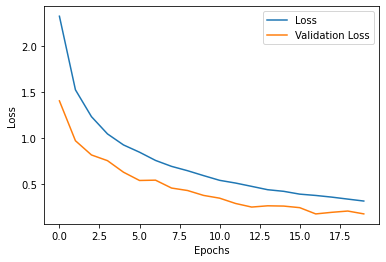

In [154]:
# testMod2aHist.history# training loss
a = testMod6aHist.history['loss']
b = testMod6aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [155]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod6a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 112us/sample - loss: 0.1791 - acc: 0.9407
Test accuracy for this model is 0.940741777420044


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['6a: Add Image Aug'],
                'training loss': [testMod6aHist.history['loss'][-1]],
              'training acc': [testMod6aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

In [156]:
#Original LeNet model w/ data augmentation and dropout layer
def testModel_6b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod6b = testModel_6b()
testMod6b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod6b.summary()

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_35 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_36 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 256)               0  

In [157]:
testMod6bHist = testMod6b.fit(train_generator, validation_data = (cnn_x_test,y_test), 
                              epochs=20, shuffle=True, callbacks = [early_stopping, history])

Epoch 1/20
550/550 [==============================] - 14s 25ms/step - loss: 2.3624 - acc: 0.2593 - val_loss: 1.4666 - val_acc: 0.5226
Epoch 2/20
550/550 [==============================] - 11s 20ms/step - loss: 1.7059 - acc: 0.4425 - val_loss: 1.0452 - val_acc: 0.6810
Epoch 3/20
550/550 [==============================] - 12s 22ms/step - loss: 1.4687 - acc: 0.5192 - val_loss: 0.9131 - val_acc: 0.7146
Epoch 4/20
550/550 [==============================] - 12s 22ms/step - loss: 1.3258 - acc: 0.5612 - val_loss: 0.7575 - val_acc: 0.7729
Epoch 5/20
550/550 [==============================] - 12s 21ms/step - loss: 1.2156 - acc: 0.5947 - val_loss: 0.7281 - val_acc: 0.7709
Epoch 6/20
550/550 [==============================] - 11s 21ms/step - loss: 1.1318 - acc: 0.6248 - val_loss: 0.5561 - val_acc: 0.8277
Epoch 7/20
550/550 [==============================] - 11s 21ms/step - loss: 1.0473 - acc: 0.6495 - val_loss: 0.6140 - val_acc: 0.7835
Epoch 8/20
550/550 [==============================] - 11s 21ms

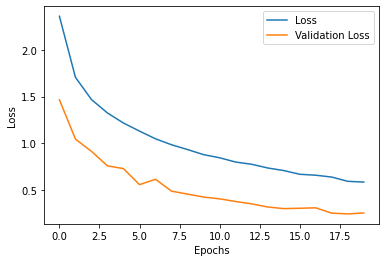

In [158]:
# testMod2aHist.history# training loss
a = testMod6bHist.history['loss']
b = testMod6bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [159]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod6b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 116us/sample - loss: 0.2528 - acc: 0.9311
Test accuracy for this model is 0.9311210513114929


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['6b: Add Image Aug and 20% DO'],
                'training loss': [testMod6bHist.history['loss'][-1]],
              'training acc': [testMod6bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

### image augmentation alone performed better than with the dropout layer ~1%

- loss in image augmentation is very high compared to dropout

### Test #7
- test hyper parameters
- learning rate, dropout rate, batch size, epochs, validation split, kernel size,
- test SGD vs Adam

In [160]:
#7a
# LeNet model with 10x learning
def testModel_7a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7a = testModel_7a()
opt = keras.optimizers.Adam(learning_rate=0.01) #10x learning rate 0.001 -> 0.01
testMod7a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7a.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_37 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_38 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 128)               0  

In [161]:
testMod7aHist = testMod7a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 237us/sample - loss: 2.3035 - acc: 0.2761 - val_loss: 0.9850 - val_acc: 0.6608
Epoch 2/20
20591/20591 [==============================] - 3s 157us/sample - loss: 0.6734 - acc: 0.7608 - val_loss: 0.5150 - val_acc: 0.8220
Epoch 3/20
20591/20591 [==============================] - 3s 149us/sample - loss: 0.3267 - acc: 0.8836 - val_loss: 0.1862 - val_acc: 0.9318
Epoch 4/20
20591/20591 [==============================] - 3s 151us/sample - loss: 0.2136 - acc: 0.9292 - val_loss: 0.1929 - val_acc: 0.9318
Epoch 5/20
20591/20591 [==============================] - 3s 162us/sample - loss: 0.1614 - acc: 0.9492 - val_loss: 0.1564 - val_acc: 0.9493
Epoch 6/20
20591/20591 [==============================] - 3s 151us/sample - loss: 0.1533 - acc: 0.9508 - val_loss: 0.1273 - val_acc: 0.9623
Epoch 7/20
20591/20591 [==============================] - 3s 140us/sample - loss: 0.1122 - acc: 0.9648 - val_lo

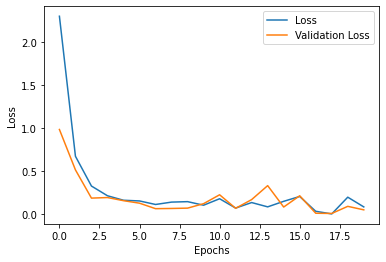

In [162]:
a = testMod7aHist.history['loss']
b = testMod7aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [1]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod7a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

NameError: name 'testMod7a' is not defined

In [ ]:
#initialize data for new data frame row
new_row = {'test': ['7a: 10x LR'],
                'training loss': [testMod7aHist.history['loss'][-1]],
              'training acc': [testMod7aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

In [38]:
#7b
# LeNet model with 3x3 kernel instead of 5x5
def testModel_7b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.Conv2D(32, 3, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7b = testModel_7b()
opt = keras.optimizers.Adam() #10x learning rate 0.001 -> 0.01
testMod7b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7b.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0   

In [41]:
testMod7bHist = testMod7b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 194us/sample - loss: 1.6788 - acc: 0.4808 - val_loss: 0.7062 - val_acc: 0.7794
Epoch 2/20
20591/20591 [==============================] - 3s 162us/sample - loss: 0.4167 - acc: 0.8661 - val_loss: 0.1964 - val_acc: 0.9385
Epoch 3/20
20591/20591 [==============================] - 3s 157us/sample - loss: 0.1288 - acc: 0.9628 - val_loss: 0.1523 - val_acc: 0.9392
Epoch 4/20
20591/20591 [==============================] - 3s 158us/sample - loss: 0.0499 - acc: 0.9876 - val_loss: 0.0183 - val_acc: 0.9965
Epoch 5/20
20591/20591 [==============================] - 3s 160us/sample - loss: 0.0411 - acc: 0.9887 - val_loss: 0.0593 - val_acc: 0.9821
Epoch 6/20
20591/20591 [==============================] - 3s 160us/sample - loss: 0.0209 - acc: 0.9949 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 7/20
20591/20591 [==============================] - 3s 164us/sample - loss: 0.0017 - acc: 1.0000 - val_lo

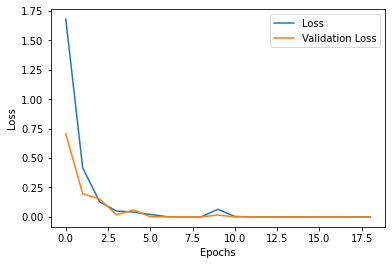

In [42]:
a = testMod7bHist.history['loss']
b = testMod7bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [46]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod7b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 94us/sample - loss: 0.6301 - acc: 0.8784
Test accuracy for this model is 0.8784160614013672


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['7b: 3x3 kernel'],
                'training loss': [testMod7bHist.history['loss'][-1]],
              'training acc': [testMod7bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

In [51]:
#7a
# LeNet model with 3x3 kernel instead of 5x5 and additional dropout layer
def testModel_7c():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.Conv2D(32, 3, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7c = testModel_7c()
opt = keras.optimizers.Adam() #10x learning rate 0.001 -> 0.01
testMod7c.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7c.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_6 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
average_pooling2d_7 (Average (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 32)          0   

In [52]:
testMod7cHist = testMod7c.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 180us/sample - loss: 1.6710 - acc: 0.4831 - val_loss: 0.6715 - val_acc: 0.7890
Epoch 2/20
20591/20591 [==============================] - 3s 170us/sample - loss: 0.4777 - acc: 0.8420 - val_loss: 0.2117 - val_acc: 0.9260
Epoch 3/20
20591/20591 [==============================] - 3s 169us/sample - loss: 0.2112 - acc: 0.9271 - val_loss: 0.0680 - val_acc: 0.9846
Epoch 4/20
20591/20591 [==============================] - 3s 166us/sample - loss: 0.1149 - acc: 0.9625 - val_loss: 0.0354 - val_acc: 0.9921
Epoch 5/20
20591/20591 [==============================] - 3s 168us/sample - loss: 0.0805 - acc: 0.9736 - val_loss: 0.0261 - val_acc: 0.9946
Epoch 6/20
20591/20591 [==============================] - 3s 169us/sample - loss: 0.0564 - acc: 0.9818 - val_loss: 0.0065 - val_acc: 0.9999
Epoch 7/20
20591/20591 [==============================] - 3s 168us/sample - loss: 0.0428 - acc: 0.9867 - val_lo

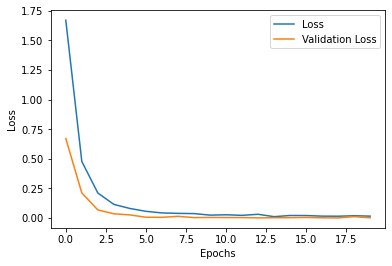

In [53]:
a = testMod7cHist.history['loss']
b = testMod7cHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [54]:
# Evaluate the trained network on the testing dataset
# slightly better than 5x5 with dropout - change to use 3x3
testLoss, testAcc = testMod7c.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 101us/sample - loss: 0.4533 - acc: 0.8981
Test accuracy for this model is 0.8980758786201477


In [ ]:
#initialize data for new data frame row
new_row = {'test': ['7b: 3x3 kernel and 20% DO'],
                'training loss': [testMod7cHist.history['loss'][-1]],
              'training acc': [testMod7cHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

# automating hyperparameter testing

- test batch sizes from 50- batch_size_lst = linspace(50,250,15)
- test learning rate range from 0.001 to 0.01
- test dropout rate linspace(10,30,5)

4/25
- test validation split from 15-30 %
- test epochs 20-60

save value of hyperparameter that gives highest acc (use argmax)


In [118]:
#set up hyperparameter lists to loop through
batch_size_range = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
dropout_rate_range = [0.1, 0.2, 0.3] #10-30% last
learning_rate_range = [0.0010, 0.003, 0.005, 0.007, 0.01]
validation_split_range = [15,20,25,30, 35]
epoch_range = [20,30,40,50,60]
loss = 'sparse_categorical_crossentropy'

In [108]:
# test 8
# LeNet model with adjustable drop out rate for loop
def testModel_HyperParamLoop(dropout_rate = 0.2):
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.Conv2D(32, 3, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = dropout_rate)(out) # updates every loop
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

In [109]:
#optimize batch size
batch_accuracies = {}

for batch_size in batch_size_range: 
    tempModel = testModel_HyperParamLoop() #create temporary model with default dropout 0.2
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size= batch_size, epochs=20, shuffle=True, callbacks = [early_stopping, history]) 
                            # testing range of batch sizes
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    batch_accuracies[batch_size] = [trainAcc, testAcc] #save model accuracy in dictionary

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 6s 306us/sample - loss: 1.2438 - acc: 0.5966 - val_loss: 0.3707 - val_acc: 0.8875
Epoch 2/20
20591/20591 [==============================] - 5s 251us/sample - loss: 0.3326 - acc: 0.8858 - val_loss: 0.1249 - val_acc: 0.9596
Epoch 3/20
20591/20591 [==============================] - 5s 250us/sample - loss: 0.1689 - acc: 0.9425 - val_loss: 0.0695 - val_acc: 0.9803
Epoch 4/20
20591/20591 [==============================] - 5s 224us/sample - loss: 0.1035 - acc: 0.9651 - val_loss: 0.0174 - val_acc: 0.9996
Epoch 5/20
20591/20591 [==============================] - 5s 237us/sample - loss: 0.0810 - acc: 0.9721 - val_loss: 0.0213 - val_acc: 0.9964
Epoch 6/20
20591/20591 [==============================] - 5s 247us/sample - loss: 0.0633 - acc: 0.9777 - val_loss: 0.0097 - val_acc: 0.9985
Epoch 7/20
20591/20591 [==============================] - 5s 250us/sample - loss: 0.0501 - acc: 0.9832 - val_lo

20591/20591 [==============================] - 1s 60us/sample - loss: 0.0219 - acc: 0.9939 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 11/20
20591/20591 [==============================] - 1s 68us/sample - loss: 0.0250 - acc: 0.9929 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 12/20
20591/20591 [==============================] - 1s 62us/sample - loss: 0.0168 - acc: 0.9949 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 13/20
20591/20591 [==============================] - 1s 63us/sample - loss: 0.0182 - acc: 0.9945 - val_loss: 0.0020 - val_acc: 0.9994
Epoch 14/20
20591/20591 [==============================] - 1s 70us/sample - loss: 0.0206 - acc: 0.9936 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 15/20
20591/20591 [==============================] - 1s 65us/sample - loss: 0.0189 - acc: 0.9944 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 16/20
20591/20591 [==============================] - 1s 65us/sample - loss: 0.0133 - acc: 0.9962 - val_loss: 8.5353e-04 - val_acc: 1.0000
Epoch 17/20
20591/20591 [===

7172/7172 [==============================] - 1s 74us/sample - loss: 0.3515 - acc: 0.9182
Test accuracy for this model is 0.9181539416313171
Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 2s 118us/sample - loss: 2.1808 - acc: 0.3198 - val_loss: 1.2413 - val_acc: 0.5951
Epoch 2/20
20591/20591 [==============================] - 1s 49us/sample - loss: 0.9785 - acc: 0.6803 - val_loss: 0.5521 - val_acc: 0.8284
Epoch 3/20
20591/20591 [==============================] - 1s 54us/sample - loss: 0.5078 - acc: 0.8286 - val_loss: 0.2903 - val_acc: 0.9175
Epoch 4/20
20591/20591 [==============================] - 1s 48us/sample - loss: 0.3054 - acc: 0.8989 - val_loss: 0.1628 - val_acc: 0.9527
Epoch 5/20
20591/20591 [==============================] - 1s 47us/sample - loss: 0.2049 - acc: 0.9320 - val_loss: 0.0929 - val_acc: 0.9824
Epoch 6/20
20591/20591 [==============================] - 1s 53us/sample - loss: 0.1521 - acc: 0.9506 - val_loss: 0

In [110]:
def GetKey(acc_dict,val):
    for key, value in acc_dict.items():
        if val == value[1]:
            return key

In [111]:
# get optimal batch size via max test accuracy
# print(batch_accuracies)
max_test_acc = max(batch_accuracies.values())[1]
optimal_batch_size = GetKey(batch_accuracies, max_test_acc)
print('Optimal batch size is {}'.format(optimal_batch_size) )

Optimal batch size is 125


In [112]:
# optimize learning rate
learning_rates = {}

for learning_rate in learning_rate_range: 
    tempModel = testModel_HyperParamLoop() #create temporary model with default 0.2 dropout
    opt = keras.optimizers.Adam(learning_rate= learning_rate) #update learning rate each loop
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size= optimal_batch_size, epochs=20, shuffle=True, callbacks = [early_stopping, history]) 
                            # testing range of batch sizes
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    learning_rates[learning_rate] = [trainAcc, testAcc] #save model accuracy in dictionary

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 3s 124us/sample - loss: 2.2424 - acc: 0.3134 - val_loss: 1.2890 - val_acc: 0.6109
Epoch 2/20
20591/20591 [==============================] - 1s 60us/sample - loss: 0.9955 - acc: 0.6802 - val_loss: 0.6218 - val_acc: 0.8100
Epoch 3/20
20591/20591 [==============================] - 1s 60us/sample - loss: 0.5509 - acc: 0.8137 - val_loss: 0.2985 - val_acc: 0.9100
Epoch 4/20
20591/20591 [==============================] - 1s 59us/sample - loss: 0.3156 - acc: 0.8926 - val_loss: 0.1521 - val_acc: 0.9642
Epoch 5/20
20591/20591 [==============================] - 1s 60us/sample - loss: 0.1961 - acc: 0.9356 - val_loss: 0.0947 - val_acc: 0.9761
Epoch 6/20
20591/20591 [==============================] - 1s 59us/sample - loss: 0.1351 - acc: 0.9568 - val_loss: 0.0449 - val_acc: 0.9936
Epoch 7/20
20591/20591 [==============================] - 1s 60us/sample - loss: 0.1006 - acc: 0.9672 - val_loss: 0.

In [113]:
# get optimal learning rate via max test accuracy
# print(learning_rates)
max_test_acc = max(learning_rates.values())[1]
optimal_learning_rate = GetKey(learning_rates, max_test_acc)
opt = keras.optimizers.Adam(learning_rate = optimal_learning_rate) # set SGD optimization with optimal lr
print('Optimal learning rate is {}'.format(optimal_learning_rate))

Optimal learning rate is 0.005


In [ ]:
# optimize epochs
epochs_dict = {}
opt = keras.optimizers.Adam(learning_rate= optimal_learning_rate)

for epoch_len in epoch_range:
    print(dropout)
    tempModel = testModel_HyperParamLoop() #create temporary model
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size= optimal_batch_size, epochs=epoch_len, shuffle=True, callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    epochs_dict[epoch_len] = [trainAcc, testAcc] #save model accuracy in dictionary

In [ ]:
# get optimal epoch length via max test accuracy
max_test_acc = max(learning_rates.values())[1]
optimal_epoch_len = GetKey(epochs_dict, max_test_acc)
print('Optimal epoch length is {}'.format(optimal_learning_rate))

In [ ]:
# optimize validation split
val_split_rates = {}
opt = keras.optimizers.Adam(learning_rate= optimal_learning_rate)

for val_split in validation_split_range:
    tempModel = testModel_HyperParamLoop() #create temporary model
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = val_split, 
                              batch_size= optimal_batch_size, epochs=optimal_epoch_len, shuffle=True,
                              callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    val_split_rates[val_split] = [trainAcc, testAcc] #save model accuracy in dictionary

In [ ]:
# get optimal learning rate via max test accuracy
# print(learning_rates)
max_test_acc = max(val_split_rates.values())[1]
optimal_val_split = GetKey(val_split_rates, max_test_acc)
print('Optimal validation split percent is {}'.format(optimal_learning_rate))

In [119]:
dropout_rates = {}
opt = keras.optimizers.Adam(learning_rate= optimal_learning_rate)

for dropout in dropout_rate_range:
    print(dropout)
    tempModel = testModel_HyperParamLoop(dropout) #create temporary model
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = optimal_val_split, 
                              batch_size= optimal_batch_size, epochs=optimal_epoch_len, shuffle=True, 
                              callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    dropout_rates[dropout] = [trainAcc, testAcc] #save model accuracy in dictionary

0.1
Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 3s 164us/sample - loss: 1.6063 - acc: 0.4909 - val_loss: 0.4955 - val_acc: 0.8326
Epoch 2/20
20591/20591 [==============================] - 2s 74us/sample - loss: 0.3196 - acc: 0.8897 - val_loss: 0.1370 - val_acc: 0.9547
Epoch 3/20
20591/20591 [==============================] - 2s 87us/sample - loss: 0.0961 - acc: 0.9681 - val_loss: 0.0482 - val_acc: 0.9863
Epoch 4/20
20591/20591 [==============================] - 2s 89us/sample - loss: 0.0689 - acc: 0.9771 - val_loss: 0.0289 - val_acc: 0.9916
Epoch 5/20
20591/20591 [==============================] - 2s 94us/sample - loss: 0.0539 - acc: 0.9808 - val_loss: 0.0128 - val_acc: 0.9971
Epoch 6/20
20591/20591 [==============================] - 2s 94us/sample - loss: 0.0365 - acc: 0.9882 - val_loss: 0.0064 - val_acc: 0.9985
Epoch 7/20
20591/20591 [==============================] - 2s 87us/sample - loss: 0.0179 - acc: 0.9950 - val_loss

In [120]:
# get optimal dropout rate via max test accuracy
'''no clue why the accuracy plummets to 4%'''
max_test_acc = max(dropout_rates.values())[1]
optimal_dropout_rate = GetKey(dropout_rates, max_test_acc)
print('Optimal dropout rate is {}'.format(optimal_dropout_rate))

Optimal dropout rate is 0.1


### Optimal hyperparameters
- batch size = 125
- dropout rate = 0.1
- learning rate = 0.005

In [116]:
dropout_rates

{0.1: [0.9943179, 0.90532625],
 0.15: [0.045213927, 0.020078082],
 0.2: [0.047447912, 0.034160625],
 0.25: [0.046865135, 0.029141104],
 0.3: [0.045893837, 0.020078082]}